<a href="https://colab.research.google.com/github/janpeter19/CONF_2023_10_MODELICA15/blob/main/BPL_TEST2_Fedbatch_fmpy_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_TEST2_Fedbatch script with FMPy

The key library FMPy is installed.

After the installation a small application BPL_TEST2_Fedbatch is loaded and run. You can continue with this example if you like.

In [1]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


In [2]:
!python --version

Python 3.11.11


In [3]:
!pip install fmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 7.3 MB/s eta 0:00:00


# BPL_TEST2_Fedbatch setup


Now specific installation and the run simulations. Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_Fedbatch_linux_om_me.fmu
* Setup-file - BPL_TEST2_Fedbatch_fmpy_explore.py

In [4]:
%%bash
git clone https://github.com/janpeter19/CONF_2023_10_MODELICA15

Cloning into 'CONF_2023_10_MODELICA15'...


In [5]:
%cd CONF_2023_10_MODELICA15

/content/CONF_2023_10_MODELICA15


In [6]:
run -i BPL_TEST2_Fedbatch_fmpy_explore.py

Linux - run FMU pre-compiled OpenModelica

Model for the process has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [7]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

In [8]:
import warnings
warnings.filterwarnings("ignore")

## BPL_TEST2_Fedbatch - demo



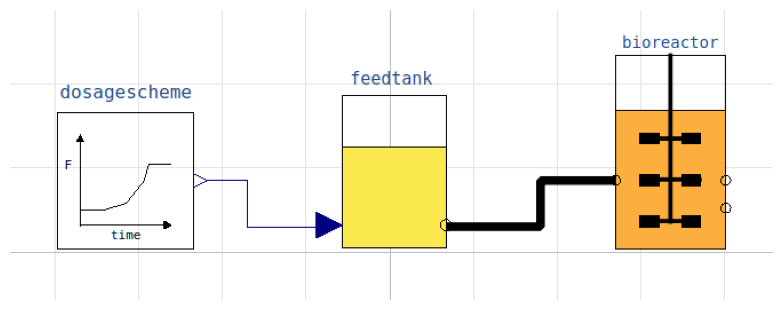

In [9]:
process_diagram()

In [10]:
describe('culture'); print(); #describe('liquidphase')                                  # Pump schedule parameter


Simplified text book model - only substrate S and cell concentration X



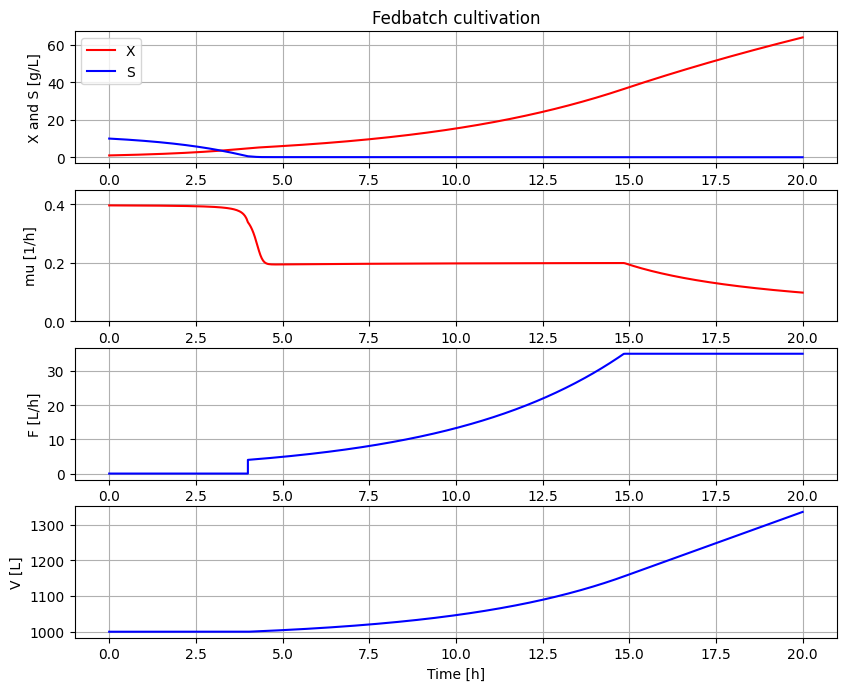

In [11]:
# Simulation with default values of the process
newplot(plotType='TimeSeries')
ax2.set_ylim([0, 0.45])
init(V_0=1000, VX_0=1*1e3, VS_0=10*1e3)
par(feedtank_S_in=600, Ks=0.1, Y=0.40)
par(t_start=4, F_start=4.0, mu_feed=0.2, F_max=35)
simu(20)

In [12]:
disp(mode='long')

bioreactor.V_0 : V_0 : 1000
bioreactor.m_0[1] : VX_0 : 1000.0
bioreactor.m_0[2] : VS_0 : 10000.0
bioreactor.culture.Y : Y : 0.4
bioreactor.culture.qSmax : qSmax : 1.0
bioreactor.culture.Ks : Ks : 0.1
feedtank.c_in[2] : feedtank_S_in : 600
feedtank.V_0 : feedtank_V_0 : 10.0
dosagescheme.mu_feed : mu_feed : 0.2
dosagescheme.t_start : t_start : 4
dosagescheme.F_start : F_start : 4.0
dosagescheme.F_max : F_max : 35


In [13]:
describe('mu')

Cell specific growth rate variable : 0.098 [ 1/h ]


In [14]:
describe('parts')

['bioreactor', 'bioreactor.culture', 'dosagescheme', 'feedtank']


In [15]:
describe('MSL')

MSL: 3.2.3 - used components: RealInput, RealOutput


In [16]:
system_info()


System information
 -OS: Linux
 -Python: 3.11.11
 -Scipy: not installed in the notebook
 -FMPy: 0.3.22
 -FMU by: OpenModelica Compiler OpenModelica 1.21.0
 -FMI: 2.0
 -Type: ME
 -Name: BPL_TEST2.Fedbatch
 -Generated: 2023-04-20T12:24:29Z
 -MSL: 3.2.3
 -Description: Bioprocess Library version 2.1.1
 -Interaction: FMU-explore for FMPy version 0.9.8
